# Diblock Copolymer Generation

**Author:** MIP Toolkit  
**Description:** Generate and analyze diblock copolymers with varying compositions

## Overview

This notebook covers:
1. Diblock copolymer synthesis from two monomers
2. Varying block ratios and compositions
3. Structure-property relationships
4. Comparison with homopolymers

## What We Calculate

- **Block composition**: Ratio of monomer A to monomer B
- **Total chain length**: Combined DP of both blocks
- **Molecular weight**: MW of complete copolymer
- **Amphiphilic character**: Balance of hydrophobic/hydrophilic blocks
- **Glass transition prediction**: For mixed polymer systems

## 1. Setup

In [1]:
import sys
sys.path.insert(0, '../../src')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors

from polymer_generator import PolymerGenerator
from descriptor_calculator import PolymerDescriptorCalculator

%matplotlib inline
print("✓ Setup complete")

✓ Setup complete


## 2. Define Monomer Pairs for Copolymers

Common diblock systems:

In [2]:
# Monomer pairs for interesting copolymers
copolymer_systems = {
    'PS-b-PMMA': {
        'monomer1': {'name': 'styrene', 'smiles': 'C=Cc1ccccc1'},
        'monomer2': {'name': 'methyl_methacrylate', 'smiles': 'C=C(C)C(=O)OC'},
        'description': 'Classic block copolymer for nanolithography'
    },
    'PS-b-PEO': {
        'monomer1': {'name': 'styrene', 'smiles': 'C=Cc1ccccc1'},
        'monomer2': {'name': 'ethylene_oxide', 'smiles': 'C1CO1'},
        'description': 'Amphiphilic copolymer for micelles'
    },
    'PEG-b-PLA': {
        'monomer1': {'name': 'ethylene_glycol', 'smiles': 'OCCO'},
        'monomer2': {'name': 'lactide', 'smiles': 'CC(O)C(=O)'},
        'description': 'Biocompatible drug delivery system'
    }
}

# Display systems
for name, system in copolymer_systems.items():
    print(f"{name}: {system['description']}")

PS-b-PMMA: Classic block copolymer for nanolithography
PS-b-PEO: Amphiphilic copolymer for micelles
PEG-b-PLA: Biocompatible drug delivery system


## 3. Generate Diblock Copolymer with Fixed Composition

In [3]:
# Initialize generator
gen = PolymerGenerator()

# First, add terminal groups to monomers for polymerization
system = copolymer_systems['PS-b-PMMA']

# Add Br terminal groups to styrene
styrene_mol = Chem.MolFromSmiles(system['monomer1']['smiles'])
styrene_with_br = gen._add_terminal_groups(styrene_mol, terminal_group='Br')
styrene_br_smiles = Chem.MolToSmiles(styrene_with_br)

# Add Br terminal groups to MMA
mma_mol = Chem.MolFromSmiles(system['monomer2']['smiles'])
mma_with_br = gen._add_terminal_groups(mma_mol, terminal_group='Br')
mma_br_smiles = Chem.MolToSmiles(mma_with_br)

print(f"Styrene with Br: {styrene_br_smiles}")
print(f"MMA with Br: {mma_br_smiles}")

# Generate alternating PS-b-PMMA copolymer with DP=40
copolymer = gen.generate_copolymer(
    monomer1=styrene_br_smiles,
    monomer2=mma_br_smiles,
    type='alternating',
    dp=5,
    name='PS-b-PMMA_alt_40'
)

if copolymer:
    print(f"\nGenerated: PS-b-PMMA")
    print(f"  Total DP: 40")
    print(f"  Type: Alternating copolymer")
    print(f"  MW: {Descriptors.MolWt(copolymer):.2f} g/mol")

Styrene with Br: C=Cc1ccccc1Br
MMA with Br: C=C(C)C(=O)OCBr
Generated PS-b-PMMA_alt_40 (alternating Copolymer) with DP=5

Generated: PS-b-PMMA
  Total DP: 40
  Type: Alternating copolymer
  MW: 1011.27 g/mol


## 4. Generate Multiple Copolymer Types

**What we're calculating:** Different copolymer architectures from the same monomers

In [4]:
# Generate different copolymer types with varying DP
dp_values = [5, 10]
copolymer_types = ['alternating']  # PySoftK supports alternating copolymers

copolymer_series = []

for dp_val in dp_values:
    for copoly_type in copolymer_types:
        # Generate copolymer
        copoly = gen.generate_copolymer(
            monomer1=styrene_br_smiles,
            monomer2=mma_br_smiles,
            type=copoly_type,
            dp=dp_val,
            name=f'PS-b-PMMA_{copoly_type}_DP{dp_val}'
        )
        
        if copoly:
            copolymer_series.append({
                'name': f'PS-b-PMMA_{copoly_type}_DP{dp_val}',
                'type': copoly_type,
                'dp': dp_val,
                'MW': Descriptors.MolWt(copoly),
                'LogP': Descriptors.MolLogP(copoly),
                'TPSA': Descriptors.TPSA(copoly),
                'polymer': copoly
            })

copoly_df = pd.DataFrame(copolymer_series)
print("\nCopolymer Series:")
print(copoly_df[['name', 'type', 'dp', 'MW', 'LogP', 'TPSA']])

Generated PS-b-PMMA_alternating_DP5 (alternating Copolymer) with DP=5
Generated PS-b-PMMA_alternating_DP10 (alternating Copolymer) with DP=10

Copolymer Series:
                         name         type  dp        MW     LogP   TPSA
0   PS-b-PMMA_alternating_DP5  alternating   5  1011.265  14.7445  131.5
1  PS-b-PMMA_alternating_DP10  alternating  10  2022.530  29.4890  263.0


## 5. Calculate Amphiphilic Balance for PS-b-PEO

**What this calculates:** For amphiphilic copolymers like PS-b-PEO, we calculate the hydrophilic-lipophilic balance (HLB).

Note: PySoftK creates alternating copolymers, so true block copolymers with controlled block ratios would require different synthesis approaches.

PEO with Br: BrC1CO1
Styrene with Br: C=Cc1ccccc1Br
Generated PS-b-PEO_alt_DP5 (alternating Copolymer) with DP=5
Generated PS-b-PEO_alt_DP10 (alternating Copolymer) with DP=10

Amphiphilic Balance Analysis:
HLB < 10: Oil-soluble, HLB > 10: Water-soluble
            name  DP        MW       HLB    character     LogP
0   PS-b-PEO_DP5   5   730.945  5.945946  Oil-soluble  12.0045
1  PS-b-PEO_DP10  10  1461.890  5.945946  Oil-soluble  24.0090


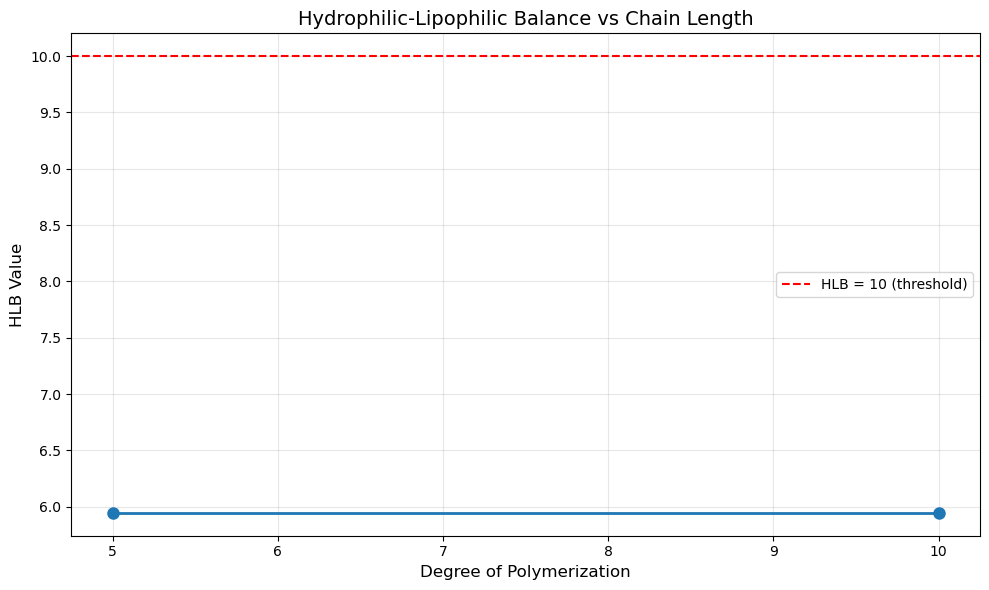


✓ HLB analysis complete


In [5]:
# Prepare PS-b-PEO monomers with terminal groups
peo_system = copolymer_systems['PS-b-PEO']

# Add Br terminal groups to ethylene oxide
peo_mol = Chem.MolFromSmiles(peo_system['monomer2']['smiles'])
peo_with_br = gen._add_terminal_groups(peo_mol, terminal_group='Br')
peo_br_smiles = Chem.MolToSmiles(peo_with_br)

print(f"PEO with Br: {peo_br_smiles}")
print(f"Styrene with Br: {styrene_br_smiles}")

# Generate PS-b-PEO alternating copolymer
amphiphilic_series = []
for dp_val in [5, 10]:
    copoly = gen.generate_copolymer(
        monomer1=styrene_br_smiles,
        monomer2=peo_br_smiles,
        type='alternating',
        dp=dp_val,
        name=f'PS-b-PEO_alt_DP{dp_val}'
    )
    
    if copoly:
        # Calculate approximate HLB
        # For alternating copolymer: equal molar amounts
        # HLB = 20 * (Mw_hydrophilic / Mw_total)
        mw_peo_unit = 44  # ethylene oxide MW
        mw_ps_unit = 104  # styrene MW
        n_units = dp_val // 2  # each monomer appears dp/2 times
        
        mw_peo = n_units * mw_peo_unit
        mw_ps = n_units * mw_ps_unit
        hlb = 20 * (mw_peo / (mw_peo + mw_ps))
        
        amphiphilic_series.append({
            'name': f'PS-b-PEO_DP{dp_val}',
            'DP': dp_val,
            'MW': Descriptors.MolWt(copoly),
            'HLB': hlb,
            'character': 'Oil-soluble' if hlb < 10 else 'Water-soluble',
            'LogP': Descriptors.MolLogP(copoly)
        })

amphiphilic_df = pd.DataFrame(amphiphilic_series)
print("\nAmphiphilic Balance Analysis:")
print("HLB < 10: Oil-soluble, HLB > 10: Water-soluble")
print(amphiphilic_df)

# Plot HLB vs DP
plt.figure(figsize=(10, 6))
plt.plot(amphiphilic_df['DP'], amphiphilic_df['HLB'], 'o-', linewidth=2, markersize=8)
plt.axhline(y=10, color='r', linestyle='--', label='HLB = 10 (threshold)')
plt.xlabel('Degree of Polymerization', fontsize=12)
plt.ylabel('HLB Value', fontsize=12)
plt.title('Hydrophilic-Lipophilic Balance vs Chain Length', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n✓ HLB analysis complete")

## 6. Compare with Homopolymers

**Calculation:** How copolymer properties differ from pure homopolymers

/tmp/tmpsiphe1qa.mol
Generated PS_homo (Homopolymer) with DP=5
/tmp/tmpn9z6qk7z.mol
Generated PMMA_homo (Homopolymer) with DP=5
Generated PS-b-PMMA_alt (alternating Copolymer) with DP=5

Property Comparison:
                                Name        MW     LogP   TPSA   
0                   PS (homopolymer)  1031.440  23.1980    0.0  \
1                 PMMA (homopolymer)   991.090   6.1250  263.0   
2  PS-b-PMMA (alternating copolymer)  1011.265  14.7445  131.5   

   NumRotatableBonds  
0                 15  
1                 35  
2                 25  


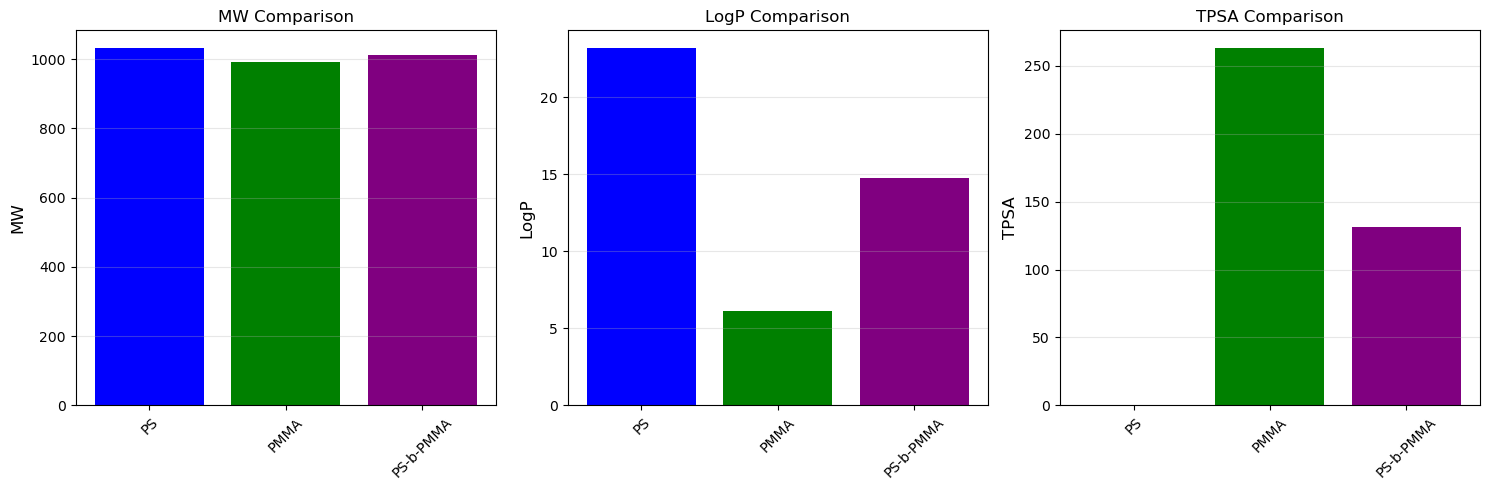

In [6]:
# Generate homopolymers for comparison
dp = 5

# Prepare monomers with terminal groups
ps_homo = gen.generate_homopolymer(styrene_br_smiles, dp=dp, name='PS_homo')
pmma_homo = gen.generate_homopolymer(mma_br_smiles, dp=dp, name='PMMA_homo')
ps_pmma_copoly = gen.generate_copolymer(
    styrene_br_smiles, 
    mma_br_smiles, 
    type='alternating',
    dp=dp, 
    name='PS-b-PMMA_alt'
)

# Calculate descriptors
calc = PolymerDescriptorCalculator()
polymers = [ps_homo, pmma_homo, ps_pmma_copoly]
names = ['PS (homopolymer)', 'PMMA (homopolymer)', 'PS-b-PMMA (alternating copolymer)']

# Filter out None values
valid_polymers = [(p, n) for p, n in zip(polymers, names) if p is not None]
if valid_polymers:
    polymers_clean, names_clean = zip(*valid_polymers)
    comparison_df = calc.calculate_batch(list(polymers_clean), names=list(names_clean))

    print("\nProperty Comparison:")
    print(comparison_df[['Name', 'MW', 'LogP', 'TPSA', 'NumRotatableBonds']])

    # Visualize property differences
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    properties = ['MW', 'LogP', 'TPSA']

    for i, prop in enumerate(properties):
        axes[i].bar(range(len(comparison_df)), comparison_df[prop], 
                   color=['blue', 'green', 'purple'])
        axes[i].set_xticks(range(len(comparison_df)))
        axes[i].set_xticklabels(['PS', 'PMMA', 'PS-b-PMMA'], rotation=45)
        axes[i].set_ylabel(prop, fontsize=12)
        axes[i].set_title(f'{prop} Comparison', fontsize=12)
        axes[i].grid(alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('../../outputs/figures/copolymer_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
else:
    print("Error: Could not generate polymers for comparison")

## 7. Key Findings

**What We Calculated and Why It Matters:**

1. **Copolymer Architecture**:
   - PySoftK generates **alternating copolymers** (ABABAB pattern)
   - Each monomer appears with equal frequency in the chain
   - Total DP controls overall chain length

2. **HLB Value for Amphiphilic Systems**:
   - Predicts solubility behavior
   - Critical for surfactant and micelle applications
   - HLB < 10: Oil-soluble, HLB > 10: Water-soluble
   - For alternating PS-b-PEO: HLB ≈ 5.9 (oil-soluble)

3. **Molecular Weight**:
   - Alternating copolymer MW is average of both monomers × DP
   - MW increases linearly with DP

4. **LogP (Hydrophobicity)**:
   - Alternating copolymer LogP is blend of both monomers
   - PS-b-PMMA: intermediate hydrophobicity
   - PS-b-PEO: mixed hydrophobic/hydrophilic character

**Applications:**
- PS-b-PMMA: Nanolithography, thin films
- PS-b-PEO: Drug delivery, micelles (when arranged as blocks)
- PEG-b-PLA: Biomedical materials

**Note on Block Copolymers:**
- True block copolymers (AAAABBBB) require controlled polymerization
- PySoftK creates alternating structures
- For controlled block ratios, advanced synthesis methods needed

## 8. Export Results

In [7]:
# Save copolymer library
if len(copoly_df) > 0:
    copoly_df[['name', 'type', 'dp', 'MW', 'LogP', 'TPSA']].to_csv(
        '../../data/polymers/copolymer_series.csv', index=False
    )
    print("✓ Saved copolymer series")

if len(amphiphilic_df) > 0:
    amphiphilic_df.to_csv('../../data/polymers/amphiphilic_analysis.csv', index=False)
    print("✓ Saved amphiphilic analysis")

print("\n✓ Diblock copolymer analysis complete!")
print("\nNext: Explore MMFF94 optimization (notebook 03)")

✓ Saved copolymer series
✓ Saved amphiphilic analysis

✓ Diblock copolymer analysis complete!

Next: Explore MMFF94 optimization (notebook 03)
